We need to place a handrail on a terrace with an empty space in its center measuring 10m x 18m. The walkway should be the same dimension on all sides.  The length of the handrail can be no more than 250m.

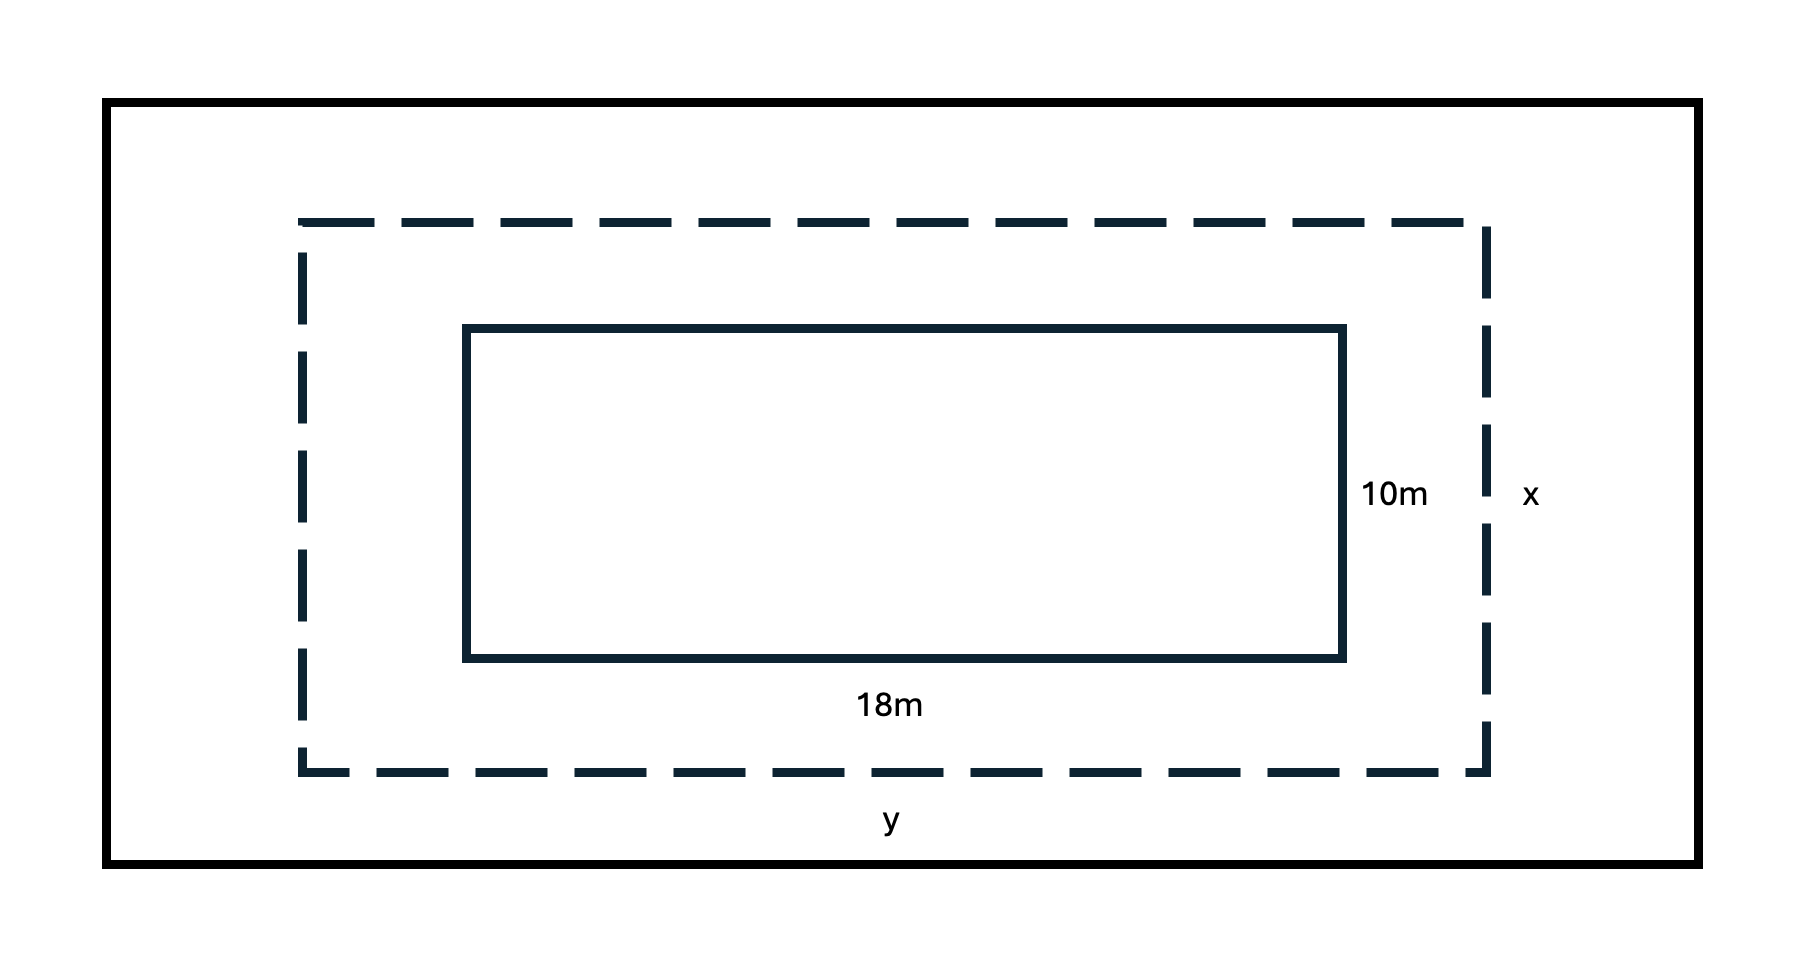

We have the following objective function:  

<center> $\large \max (xy - 180) \space\space s.t.$

$x-10 = y-18,\space$ or $\space x-y=-8$

$2x + 2y + 2(10) + 2(18) \le 250,\space$ or $\space x+y \le 97$

$x,y \ge 0$



In [1]:
# Ipopt installer

import sys

if "google.colab" in sys.modules:
    !wget "https://raw.githubusercontent.com/IDAES/idaes-pse/main/scripts/colab_helper.py"
    import colab_helper
    colab_helper.install_idaes()
    colab_helper.install_ipopt()

--2025-08-20 19:38:01--  https://raw.githubusercontent.com/IDAES/idaes-pse/main/scripts/colab_helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5459 (5.3K) [text/plain]
Saving to: ‘colab_helper.py.1’

colab_helper.py.1   100%[===================>]   5.33K  --.-KB/s    in 0s      

2025-08-20 19:38:01 (40.8 MB/s) - ‘colab_helper.py.1’ saved [5459/5459]

idaes was found! No need to install.


In [2]:
import pyomo.environ as pyo
from pyomo.environ import *

In [3]:
model = pyo.ConcreteModel()

model.x = Var(bounds=(0, None))
model.y = Var(bounds=(0, None))

x = model.x
y = model.y

In [4]:
model.C1 = Constraint(expr=x - y == -8)
model.C2 = pyo.Constraint(expr=x + y <= 97)

model.obj = pyo.Objective(expr=x*y-180, sense=maximize)

In [5]:
opt = pyo.SolverFactory('ipopt')
opt.solve(model)

{'Problem': [{'Lower bound': -inf, 'Upper bound': inf, 'Number of objectives': 1, 'Number of constraints': 2, 'Number of variables': 2, 'Sense': 'unknown'}], 'Solver': [{'Status': 'ok', 'Message': 'Ipopt 3.13.2\\x3a Optimal Solution Found', 'Termination condition': 'optimal', 'Id': 0, 'Error rc': 0, 'Time': 0.01585555076599121}], 'Solution': [OrderedDict({'number of solutions': 0, 'number of solutions displayed': 0})]}

In [6]:
objective = pyo.value(model.obj)
x_value = pyo.value(x)
y_value = pyo.value(y)
print("x =", x_value)
print("y =", y_value)
print("Objective =", objective)

x = 44.500000484974166
y = 52.500000484974166
Objective = 2156.2500470424943
